<a href="https://colab.research.google.com/github/rmr327/LocalLime/blob/main/rmr62_local_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview

The aim of this notebook is to demonstrate the application of LIME to a pretrained InceptionV3 image classification model. The purpose of using LIME is to obtain local explanations for the classification decisions made by black box models for specific classifications/predictions. Additionally, a discussion section is provided at the end of the notebook.

### Install libraries

In [1]:
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 scikit-learn==1.2.2 lime==0.2.0.1


### Import necessary libraries

In [56]:
import os
import sys
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
from typing import List
import warnings


warnings.filterwarnings('ignore', category=FutureWarning)

### Download a sample image

In [3]:
# Downloading a sample image
!wget https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg

--2024-10-03 10:24:44--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168949 (165K) [image/jpeg]
Saving to: ‘zidane.jpg.1’

zidane.jpg.1        100%[===================>] 164.99K  --.-KB/s    in 0.02s   

2024-10-03 10:24:44 (7.30 MB/s) - ‘zidane.jpg.1’ saved [168949/168949]



### Code

In [69]:
# Load the model
inet_model = inc_net.InceptionV3()

In [66]:
def transform_img_fn(path_list: List) -> np.array:
  """
  This function takes a list of image paths and returns a numpy array of preprocessed images. for
  inception v3 model.
  """
  return np.vstack([inc_net.preprocess_input(np.expand_dims(image.img_to_array(image.load_img(img_path, target_size=(299, 299))), axis=0)) for img_path in path_list])

> Generating Inception Prediction

We can see below that the number 1 prediction for this image by the inception V3 model was a groom.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
('n10148035', 'groom', 0.22947745)
('n04350905', 'suit', 0.20751053)
('n04296562', 'stage', 0.12382443)
('n03680355', 'Loafer', 0.07928695)
('n02111129', 'Leonberg', 0.069767825)


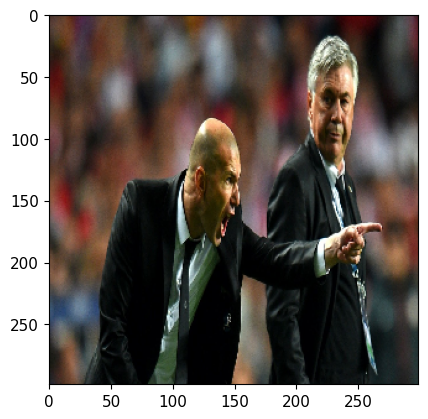

In [68]:
# Transform the image
images = transform_img_fn(['zidane.jpg'])

# Display the image
# (Divide by 2 and add 0.5 to reverse Inception's image preprocessing)
plt.imshow(images[0] / 2 + 0.5)

# Generate predictions using the Inception model
preds = inet_model.predict(images)

# Decode and print the predictions
for x in decode_predictions(preds)[0]:
    print(x)

> Initializing LIME image explainer

NOTE: LIME is model agnostic and can be used on a wide range of black box models.

In [70]:
# Initialize the LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction for the image
# - images[0].astype('double'): The image to explain
# - inet_model.predict: The prediction function
# - top_labels=5: Consider the top 5 predicted labels
# - hide_color=0: Hide superpixels with color 0 (black)
# - num_samples=1000: Number of samples to generate
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

>

> Lets see which parts of the image was responsible for the Groom prediction.

The get_image_and_mask function uses the selected superpixels (based on the significance of impact on the prediction) to create a visualization that highlights the important regions of the image.


NOTE: changing the num features parameter below will adjust how many superpixels (areas) are considered.

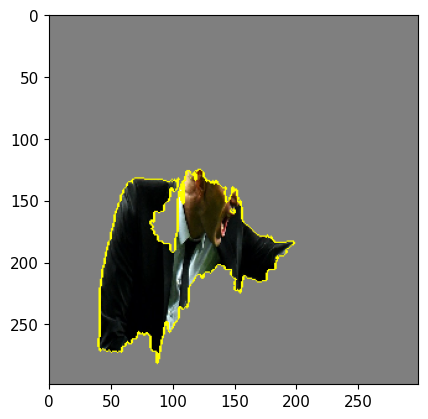

In [80]:
# Get the image and mask for the top predicted label
# - explanation.top_labels[0]: Index of the top label
# - positive_only=True: Only show positive contributions
# - num_features=5: Number of superpixels to display
# - hide_rest=True: Hide the rest of the image
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)


# Display the image with highlighted superpixels
# Divide by 2 and add 0.5 to reverse Inception's preprocessing
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

> Lets see both the parts of the image that positively contributed to the groom prediction (highlighted in green), and also the parts of the image that negatively contributed to the groom prediction (highligted in red).

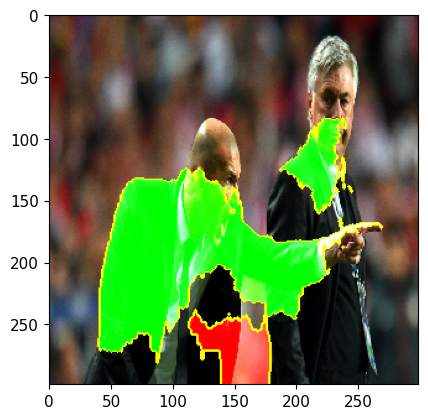

In [85]:
# Get the image and mask for the top predicted label
# - explanation.top_labels[0]: Index of the top label
# - positive_only=False: Show both positive and negative contributions
# - num_features=10: Number of features to display
# - hide_rest=False: Show the entire image
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

# Display the image with highlighted superpixels
# Divide by 2 and add 0.5 to reverse Inception's preprocessing
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

> Lets see what the explanation weights were across the entire picture. The colorbar shows the values of the weights. Positive means positive influience and vice versa.

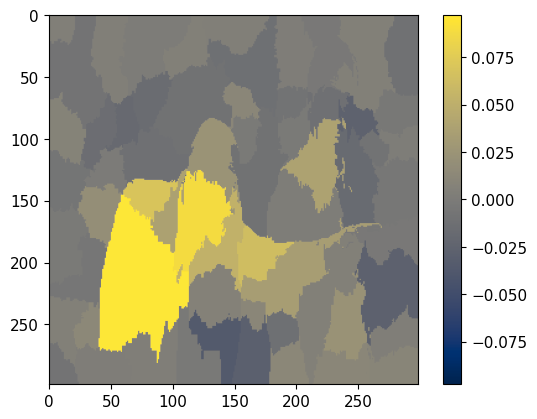

In [84]:
# Select the top predicted class
ind = explanation.top_labels[0]

# Create a dictionary mapping superpixel indices to explanation weights
dict_heatmap = dict(explanation.local_exp[ind])

# Generate a heatmap from the explanation weights
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

# Display the heatmap using a diverging colormap for better visualization
plt.imshow(heatmap, cmap = 'cividis', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

### Discussion


> Why LIME?

LIME is a popular explanation technique that provides local interpretability for machine learning models. It works by approximating the model locally with an interpretable model, such as a linear model, to explain individual predictions.

> I chose LIME for the following reasons:

**Model-Agnostic**: LIME can be applied to any machine learning model, including complex models like InceptionV3, without requiring access to the model’s internal structure.

**Local Explanations**: LIME focuses on explaining individual predictions, which is useful for understanding specific instances and identifying potential biases or errors in the model.

**Human-Interpretable**: The explanations provided by LIME are easy to understand for humans, making it suitable for communicating model behavior to non-experts.

>Strengths

**Versatility**: LIME can be used with any machine learning model, making it a versatile tool for interpretability.

**Simplicity**: The technique is relatively simple to implement and understand, providing clear and concise explanations.

**Flexibility**: LIME allows for the use of different interpretable models (e.g., linear models, decision trees) to approximate the local behavior of the complex model.

>Limitations

**Approximation Quality**: The quality of the explanations depends on how well the interpretable model approximates the complex model locally. In some cases, the approximation may not be accurate.

**Computational Cost**: Generating explanations with LIME can be computationally expensive, especially for large datasets or complex models like InceptionV3.

**Stability**: The explanations provided by LIME can be sensitive to the choice of parameters and the sampling process, leading to variability in the results.

> Potential Improvements

**Enhanced Sampling**: Improving the sampling process to better capture the local behavior of the model can lead to more accurate explanations.

**Hybrid Approaches**: Combining LIME with other interpretability techniques, such as SHAP (SHapley Additive exPlanations), can provide more robust and comprehensive explanations.

**Parameter Tuning**: Fine-tuning the parameters of LIME, such as the number of samples and the type of interpretable model, can improve the stability and quality of the explanations.

In summary, LIME is a powerful and flexible technique for explaining individual predictions of complex models like InceptionV3. While it has some limitations, potential improvements can enhance its effectiveness and reliability.

### References

https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb

https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/explainable-ml-example-notebooks/local_explanations.ipynb#scrollTo=TBoIW4G-gpC9

Microsoft co-pilot was used to help with the discussion.